time: 0.4361698627471924


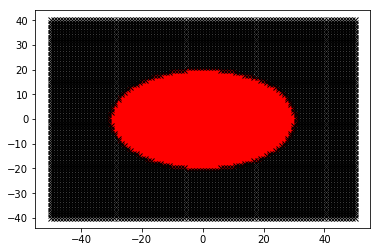

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

def within(grid,curves,N=None):
    # mn: grid of vectors vectors, shape (griddims,2)
    # pts alle punten van de kromme, shape (curvedims,#pts,2)
    # returns windingsgetallen van krommes rond gridpunten, 0 als het erbuiten ligt, shape (griddims, curvedims)
    eps=0.000000001
    curveshape = tuple(np.ones((len(grid.shape)-1,),dtype=np.uint8))+curves.shape
    gridshape = grid.shape[:-1]+tuple(np.ones((len(curves.shape)-1,),dtype=np.uint8))+(grid.shape[-1],)
    dp = curves.reshape(curveshape)-grid.reshape(gridshape)
    E = dp/np.maximum(np.sum((dp) ** 2,axis=-1,keepdims=True),eps)/2/np.pi
    if N is None:
        N= np.dot(pts - np.roll(curves,1,axis=-2),np.array([[0,-1],[1,0]])).reshape(curveshape)
    return np.round(np.sum(E*N,axis=(-2,-1))),N
        

a=30.2
b=20.3
param = np.arange(1000)/1000*2*np.pi
pts = np.array([a*np.cos(param),b*np.sin(param)]).T
fig,ax = plt.subplots()
ax.plot(pts.T[0],pts.T[1])

t=time.time()
xgrid = np.linspace(-50,50,101)
ygrid=np.linspace(-40,40,81)
MN = np.array(np.meshgrid(xgrid,ygrid))
out,N= within(MN.transpose((1,2,0)),pts)
print('time: '+str(time.time()-t))
ax.plot(MN[0][out>0],MN[1][out>0],marker='o',c='r',linestyle='')
ax.plot(MN[0][out==0],MN[1][out==0],marker='x',c='k',linestyle='')
plt.show()

time: 0.005013465881347656


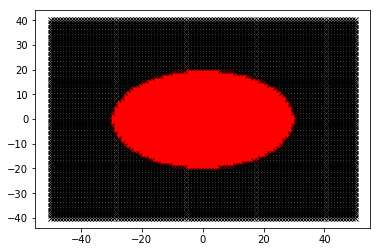

In [2]:
def within1(ms,ns,pts):
    out=[]
    for m in ms:
        #scan vertical axis
        leftright = np.sign(pts[:,0]-m)
        intersection = ~(np.roll(leftright,0)-np.roll(leftright,1)==0)
        ys = pts[intersection,1]
        out = out + [np.searchsorted(np.sort(ys),ns) % 2]
    return np.array(out).T

fig1,ax1 = plt.subplots()
ax1.plot(pts.T[0],pts.T[1])

t=time.time()
out= within1(xgrid,ygrid,pts)
print('time: '+str(time.time()-t))
ax1.plot(MN[0][out>0],MN[1][out>0],marker='o',c='r',linestyle='')
ax1.plot(MN[0][out==0],MN[1][out==0],marker='x',c='k',linestyle='')
plt.show()

        